In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dice_sums = defaultdict(int)

for die_1 in range(1, 7):
    for die_2 in range(1, 7):
        sum_value = die_1 + die_2
        dice_sums[sum_value] += 1

dice_sums = dict(sorted(dice_sums.items(), key=lambda x: x[0]))

sum_values = np.fromiter(dice_sums.keys(), dtype=int)
frequencies = np.fromiter(dice_sums.values(), dtype=int)
probabilities = frequencies / frequencies.sum()

In [3]:
mean_value = np.mean(sum_values)
median_value = np.median(sum_values)
variance_value = np.var(sum_values)
std_dev_value = np.sqrt(variance_value)
max_freq = max(dice_sums.values())
most_common = [s for (s, f) in dice_sums.items() if f == max_freq]

print("-" * 104)

running_total = 0
for (sum_val, freq) in dice_sums.items():
    prob = freq / sum(frequencies)
    running_total += prob
    print(f"Sum: {sum_val} --- Count: {freq}  | Probability: {prob:.2%} "
          f"  | Cumulative: {running_total:.2%} | 1 From {1 / prob:.1f} rolls")


--------------------------------------------------------------------------------------------------------
Sum: 2 --- Count: 1  | Probability: 2.78%   | Cumulative: 2.78% | 1 From 36.0 rolls
Sum: 3 --- Count: 2  | Probability: 5.56%   | Cumulative: 8.33% | 1 From 18.0 rolls
Sum: 4 --- Count: 3  | Probability: 8.33%   | Cumulative: 16.67% | 1 From 12.0 rolls
Sum: 5 --- Count: 4  | Probability: 11.11%   | Cumulative: 27.78% | 1 From 9.0 rolls
Sum: 6 --- Count: 5  | Probability: 13.89%   | Cumulative: 41.67% | 1 From 7.2 rolls
Sum: 7 --- Count: 6  | Probability: 16.67%   | Cumulative: 58.33% | 1 From 6.0 rolls
Sum: 8 --- Count: 5  | Probability: 13.89%   | Cumulative: 72.22% | 1 From 7.2 rolls
Sum: 9 --- Count: 4  | Probability: 11.11%   | Cumulative: 83.33% | 1 From 9.0 rolls
Sum: 10 --- Count: 3  | Probability: 8.33%   | Cumulative: 91.67% | 1 From 12.0 rolls
Sum: 11 --- Count: 2  | Probability: 5.56%   | Cumulative: 97.22% | 1 From 18.0 rolls
Sum: 12 --- Count: 1  | Probability: 2.78%   

In [4]:
print("-" * 104)

print(f"STATISTICAL SUMMARY: ")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Variance: {variance_value:.2f}")
print(f"Standard Deviation: {std_dev_value:.2f}")
print(f"Most Common Sum(s): {' '.join(map(str, most_common))}")

print("-" * 104)

--------------------------------------------------------------------------------------------------------
STATISTICAL SUMMARY: 
Mean: 7.00
Median: 7.00
Variance: 10.00
Standard Deviation: 3.16
Most Common Sum(s): 7
--------------------------------------------------------------------------------------------------------


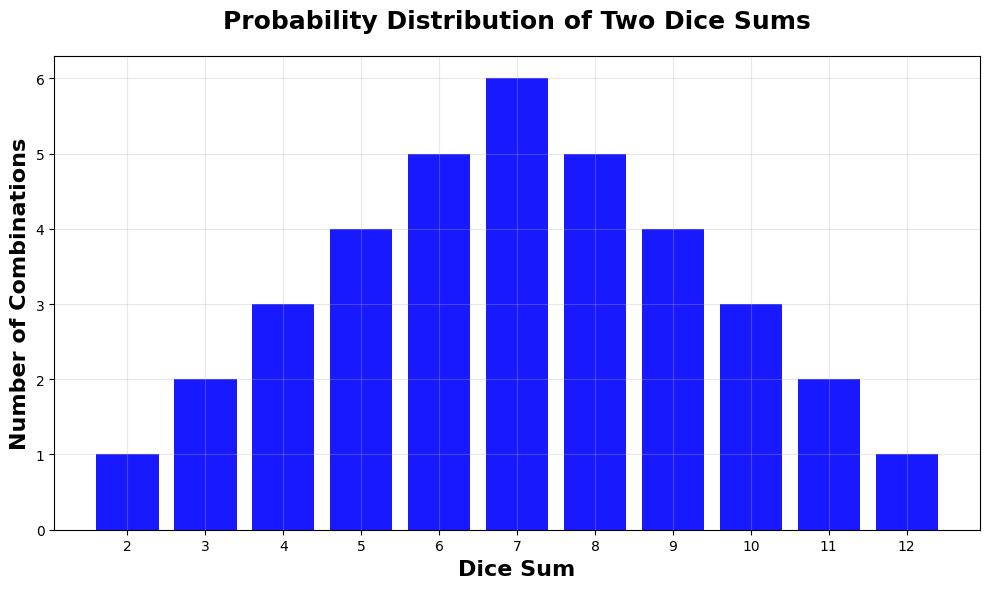

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(sum_values, frequencies, color="blue", alpha=0.9)
plt.xlabel("Dice Sum", fontsize=16, fontweight="bold")
plt.ylabel("Number of Combinations", fontsize=16, fontweight="bold")
plt.title("Probability Distribution of Two Dice Sums", fontsize=18, fontweight="bold", pad=20)
plt.xticks(sum_values)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()